In [107]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score


In [108]:
import joblib

In [109]:
# Download NLTK data
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
import gdown

# File ID from the Google Drive shareable link
file_id = '1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP'
# URL to be used with gdown
gdown_url = f'https://drive.google.com/uc?id={file_id}'

# Download the file
gdown.download(gdown_url, 'data.csv', quiet=False)

# Read the CSV file into a DataFrame
df = pd.read_csv('data.csv')
df.head()

Downloading...
From (original): https://drive.google.com/uc?id=1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP
From (redirected): https://drive.google.com/uc?id=1pexbKsezfklXDaF6sI_YhTU8fSJAIgpP&confirm=t&uuid=fd157158-8f56-43e8-bd31-35fcffcabfa1
To: /content/data.csv
100%|██████████| 266M/266M [00:04<00:00, 61.1MB/s]


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [112]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [113]:
# Get unique values
unique_values = df['primaryCategories'].unique()

print(unique_values)

['Health & Beauty' 'Electronics' 'Office Supplies'
 'Animals & Pet Supplies' 'Home & Garden' 'Electronics,Furniture'
 'Toys & Games,Electronics' 'Electronics,Media'
 'Office Supplies,Electronics']


In [114]:
data = df[["dateAdded", "primaryCategories", "reviews.username", "brand", "reviews.text", "reviews.title", "reviews.rating"]]


data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [115]:
# Concatenate
df['reviews.text'] = df['reviews.text'] + ' ' + df['reviews.title']

data.head()

,dateAdded,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating
0,2015-10-30T08:59:32Z,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3
1,2015-10-30T08:59:32Z,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4
2,2015-10-30T08:59:32Z,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5
3,2015-10-30T08:59:32Z,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5
4,2015-10-30T08:59:32Z,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5


In [117]:
df = pd.DataFrame(data)

# Convert the 'dateAdded' column to datetime format
data['dateAdded'] = pd.to_datetime(data['dateAdded'])

# Extract the year and create a new column 'year'
data['year'] = data['dateAdded'].dt.year

# Drop column
df.drop(['dateAdded'], axis=1, inplace=True)

# Display the resulting DataFrame
df.head()


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [118]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

primaryCategories    0
reviews.username     5
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


In [119]:
# Remove rows where 'reviews.username' is empty
data = data.dropna(subset=['reviews.username'])

# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

print (missing_values)
df.head()

dateAdded            0
primaryCategories    0
reviews.username     0
brand                0
reviews.text         0
reviews.title        0
reviews.rating       0
year                 0
dtype: int64


,primaryCategories,reviews.username,brand,reviews.text,reviews.title,reviews.rating,year
0,Health & Beauty,Byger yang,Amazonbasics,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,3,2015
1,Health & Beauty,ByMG,Amazonbasics,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,4,2015
2,Health & Beauty,BySharon Lambert,Amazonbasics,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,5,2015
3,Health & Beauty,Bymark sexson,Amazonbasics,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,5,2015
4,Health & Beauty,Bylinda,Amazonbasics,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,5,2015


In [120]:
# Get the value counts for the 'reviews.rating' column
rating_counts = df['reviews.rating'].value_counts()
print(rating_counts)

reviews.rating
5    19897
4     5648
3     1206
1      965
2      616
Name: count, dtype: int64


In [121]:
# Function to determine negative, neutral and positive
def review_sentiment(rating):
    if rating in [1, 2]:
        return "negative"
    elif rating in [3]:
        return "neutral"
    elif rating in [4, 5]:
        return "positive"
    else:
        return None

<ipython-input-122-c27b5abb5f51>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, order=['negative', 'neutral', 'positive'], palette='viridis')


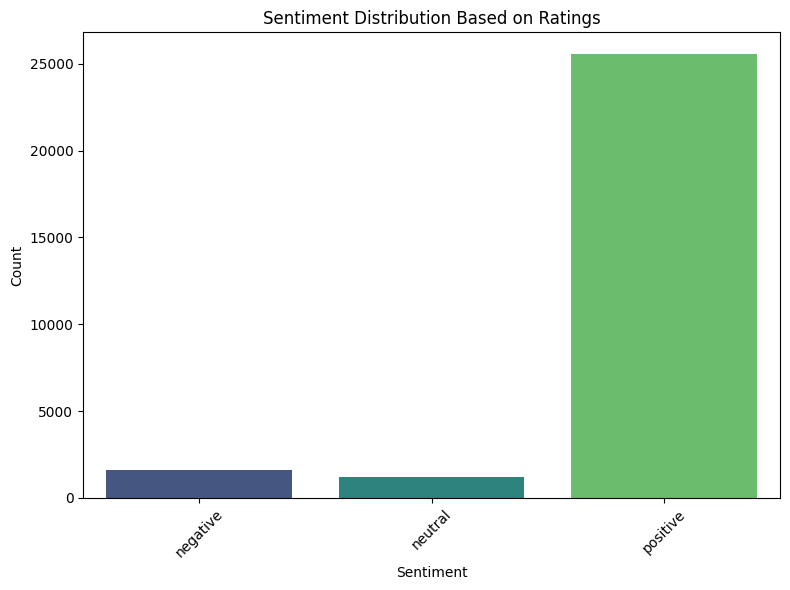

In [122]:
# Apply review_sentiment function to create a new 'sentiment' column
df['sentiment'] = df['reviews.rating'].apply(review_sentiment)

# Plotting the sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, order=['negative', 'neutral', 'positive'], palette='viridis')
plt.title('Sentiment Distribution Based on Ratings')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [127]:
# Define a function to clean text data
def clean_text(text):
    text = text.lower()  # Convert text to lowercase
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove special characters and punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove unnecessary whitespace
    return text

In [128]:
# Apply text cleaning
data['reviews.text'] = data['reviews.text'].apply(clean_text)

# Display the resulting DataFrame
print(data.head())

                  dateAdded primaryCategories  reviews.username         brand  \
0 2015-10-30 08:59:32+00:00   Health & Beauty        Byger yang  Amazonbasics   
1 2015-10-30 08:59:32+00:00   Health & Beauty              ByMG  Amazonbasics   
2 2015-10-30 08:59:32+00:00   Health & Beauty  BySharon Lambert  Amazonbasics   
3 2015-10-30 08:59:32+00:00   Health & Beauty     Bymark sexson  Amazonbasics   
4 2015-10-30 08:59:32+00:00   Health & Beauty           Bylinda  Amazonbasics   

                                        reviews.text  \
0  i order 3 of them and one of the item is bad q...   
1  bulk is always the le expensive way to go for ...   
2  well they are not duracell but for the price i...   
3  seem to work a well a name brand battery at a ...   
4  these battery are very long lasting the price ...   

                                       reviews.title  reviews.rating  year  
0  ... 3 of them and one of the item is bad quali...               3  2015  
1  ... always the less

In [129]:
# Tokenization and Lemmatization
lemmatizer = WordNetLemmatizer()

In [130]:
def tokenize_and_lemmatize(text):
    tokens = word_tokenize(text)  # Tokenize the text
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]  # Lemmatize each token
    return ' '.join(lemmatized_tokens)

# Apply tokenization and lemmatization
data['reviews.text'] = data['reviews.text'].apply(tokenize_and_lemmatize)

Logistic Regression

In [131]:
# Define features and target variable
X = data['reviews.text']
y = data['reviews.rating']

In [132]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In the context of using GridSearchCV for hyperparameter tuning, the validation set is implicitly handled within the cross-validation process.

In [133]:
X_train.shape

(22661,)

In [134]:
X_test.shape

(5666,)

In [137]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [138]:
# Create a document-term matrix using CountVectorizer
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

In [140]:
count_vectorizer

CountVectorizer(max_features=5000)

In [141]:
# Train the logistic regression model on TF-IDF features
model = LogisticRegression(max_iter=1000) #Increased max_iter, as initially the model failed to converge
model.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [142]:
# Predictions on the test set (optional: typically done after model selection and hyperparameter tuning)
y_test_pred = model.predict(X_test_tfidf)

In [143]:
# Evaluate the model on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Test Accuracy: 0.7525591246028944
Test Classification Report:
               precision    recall  f1-score   support

           1       0.69      0.52      0.59       193
           2       0.48      0.12      0.19       123
           3       0.47      0.12      0.20       241
           4       0.53      0.28      0.37      1130
           5       0.79      0.96      0.86      3979

    accuracy                           0.75      5666
   macro avg       0.59      0.40      0.44      5666
weighted avg       0.71      0.75      0.71      5666



Grid search with cross-validation

In [144]:
# Define a pipeline with TF-IDF vectorizer and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', LogisticRegression(max_iter=1000))
])

In [145]:
# Define a parameter grid for grid search
param_grid = {
    'tfidf__max_features': [2000, 5000, 10000], #This parameter controls the maximum number of features (words or n-grams) that TF-IDF vectorization will consider
    'clf__C': [0.1, 1.0, 10.0],             #This parameter adjusts the regularization strength in logistic regression
    'clf__penalty': ['l2']                 #This parameter specifies the norm used in the regularization term of logistic regression
}

In [146]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(max_features=10000)),
                                       ('clf',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'clf__C': [0.1, 1.0, 10.0], 'clf__penalty': ['l2'],
                         'tfidf__max_features': [2000, 5000, 10000]},
             scoring='accuracy', verbose=1)

In [147]:
# Print the best parameters and best score found during grid search
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-validation Accuracy:", grid_search.best_score_)

Best Parameters: {'clf__C': 10.0, 'clf__penalty': 'l2', 'tfidf__max_features': 10000}
Best Cross-validation Accuracy: 0.7883143405163155


In [152]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

# Print the results in the specified format
print(f"Test Accuracy: {test_accuracy}")
print("Test Classification Report:\n", classification_rep)

Test Accuracy: 0.793328626897282
Test Classification Report:
               precision    recall  f1-score   support

           1       0.73      0.68      0.70       193
           2       0.53      0.40      0.46       123
           3       0.66      0.40      0.50       241
           4       0.63      0.44      0.52      1130
           5       0.83      0.94      0.88      3979

    accuracy                           0.79      5666
   macro avg       0.68      0.57      0.61      5666
weighted avg       0.78      0.79      0.78      5666



In [148]:
# Get the best model (best estimator)
best_model = grid_search.best_estimator_

In [149]:
# Save the best model to a file
joblib.dump(best_model, 'best_model_logreg.pkl')

['best_model_logreg.pkl']